<a href="https://colab.research.google.com/github/34maksuda/Pytorch-Tutorial-Youtube/blob/main/Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
#Change the lable from string to numbers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)

<ipython-input-5-def1d288a586>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


In [ ]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
#Train Test Split! Set x,y
x = my_df.drop('species', axis = 1)
y = my_df['species']

In [ ]:
x = x.values
y = y.values

In [ ]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
#train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
#Convert the features from numpy array to tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
#Create a Model Class that inherits nn.Module
class my_model(nn.Module):
  #Input layer (4 features of the flower)-->Hidden layer 1(number of neurons)
  #-->Hidden layer 2(number of neurons)-->
  # Output(3 class of flower)
  def __init__(self, in_features=4, h1=8, h2=9, out_features = 3):
    super().__init__() # Instantiate out nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x= F.relu(self.fc2(x))
    x = self.out(x)

    return x


#Pick a manual seed for randomization
torch.manual_seed(41)
#Create an instance of model
model = my_model()

In [ ]:
#Set the criteria of model to measure the error
criterion = nn. CrossEntropyLoss()
#Choose adam optimizer, lr = learning rate (if error doesn't go down after a bunch of iteration(epochs), lower the lr)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [ ]:
model.parameters

<bound method Module.parameters of my_model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
#Train our model
#Epochs? (one run through all the training data in our network)
epochs = 100
losses = []

for i in range(epochs):
  #Go forward and get a prediction
  y_pred = model.forward(x_train)

  #Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train)
  #Keep track of our losses
  losses.append(loss.detach().numpy()) # detach the value from gradient

  #print every 10 epoch
  if i % 10 ==0 :
    print(f'Epoch:{i} and loss: {loss}')

  #Do some backpropagation: Take the error rate of forward propagation and feed
  #it back through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:0 and loss: 1.125285267829895
Epoch:10 and loss: 1.0188318490982056
Epoch:20 and loss: 0.8338496685028076
Epoch:30 and loss: 0.6025498509407043
Epoch:40 and loss: 0.41379642486572266
Epoch:50 and loss: 0.28254783153533936
Epoch:60 and loss: 0.19306634366512299
Epoch:70 and loss: 0.13670380413532257
Epoch:80 and loss: 0.10248851776123047
Epoch:90 and loss: 0.08341799676418304


Text(0, 0.5, 'Loss')

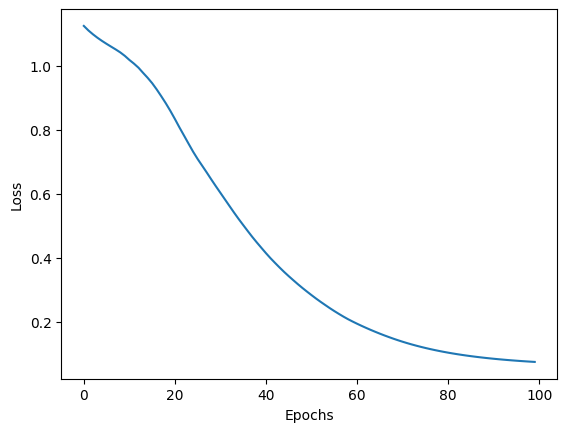

In [ ]:
#Graph it out!
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
with torch.no_grad():
  y_eval = model.forward(x_test)
  loss = criterion(y_eval, y_test)

In [ ]:
print(loss)

tensor(0.0659)


In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_eval = model.forward(data)
    print(f'{i+1}.) {str(y_eval)} \t {y_test[i]} \t {y_eval.argmax().item()}')

    #Correct or not
    if y_eval.argmax().item() == y_test[i]:
      correct = correct + 1
print(f'we got {correct} correct')

1.) tensor([-4.1795,  5.2838,  2.3345]) 	 1 	 1
2.) tensor([ 4.7665, -2.3949, -2.9980]) 	 0 	 0
3.) tensor([-10.1948,   3.9714,  13.7997]) 	 2 	 2
4.) tensor([-4.4656,  5.1942,  2.8970]) 	 1 	 1
5.) tensor([-4.7588,  5.7623,  2.7327]) 	 1 	 1
6.) tensor([ 4.3316, -1.9997, -2.8022]) 	 0 	 0
7.) tensor([-2.5971,  4.4958,  0.6615]) 	 1 	 1
8.) tensor([-6.9635,  5.0945,  7.1304]) 	 2 	 2
9.) tensor([-5.2100,  4.9461,  4.3900]) 	 1 	 1
10.) tensor([-3.1201,  4.9901,  0.9299]) 	 1 	 1
11.) tensor([-6.1828,  4.9779,  5.9907]) 	 2 	 2
12.) tensor([ 4.5328, -2.2278, -2.8559]) 	 0 	 0
13.) tensor([ 5.1847, -2.7950, -3.1701]) 	 0 	 0
14.) tensor([ 4.5219, -2.2133, -2.8548]) 	 0 	 0
15.) tensor([ 4.8994, -2.5495, -3.0303]) 	 0 	 0
16.) tensor([-4.5544,  5.5063,  2.6977]) 	 1 	 1
17.) tensor([-7.9222,  4.0615,  9.9288]) 	 2 	 2
18.) tensor([-3.1509,  5.0050,  0.9467]) 	 1 	 1
19.) tensor([-4.1263,  4.9738,  2.5960]) 	 1 	 1
20.) tensor([-7.8391,  4.0088,  9.8401]) 	 2 	 2
21.) tensor([ 4.2179, -1.9